# BANK (EDA and ML)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

bank_df = pd.read_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/bank-marketing-campaign-data.csv", sep = ";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
bank_df.shape

(41188, 21)

In [36]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
# Eliminar duplicados
bank_df = bank_df.drop_duplicates().reset_index(drop = True)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### - Análisis de variables univariante

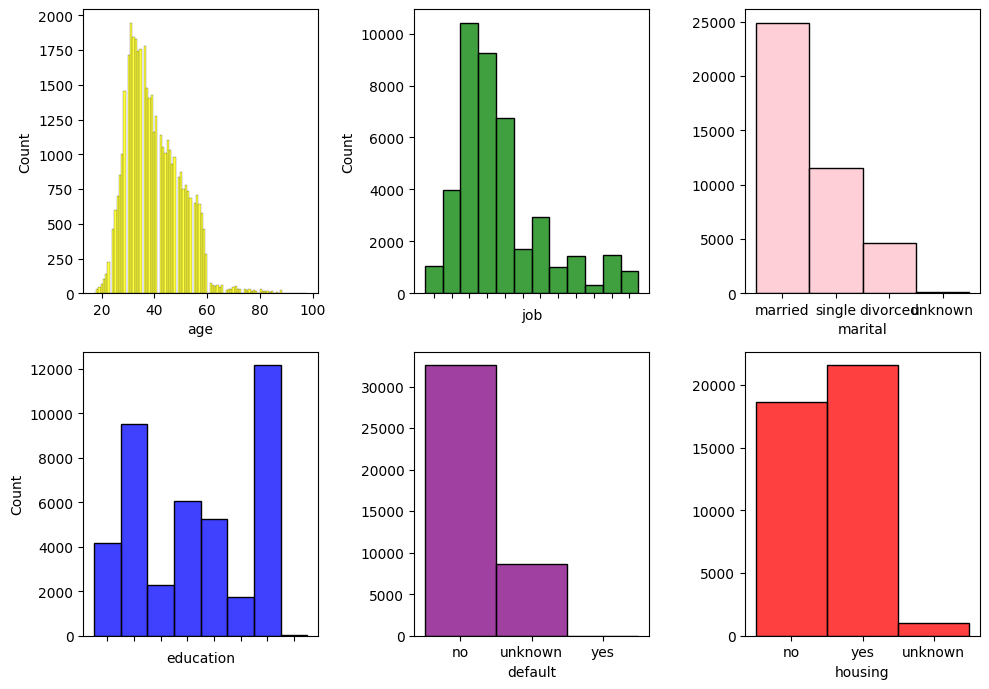

In [38]:
# Hacemos el análisis univariante de todas las variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="age", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="job", color="green").set_xticklabels([])
sns.histplot(ax=axis[0, 2], data=bank_df, x="marital", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="education", color="blue").set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=bank_df, x="default", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="housing", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

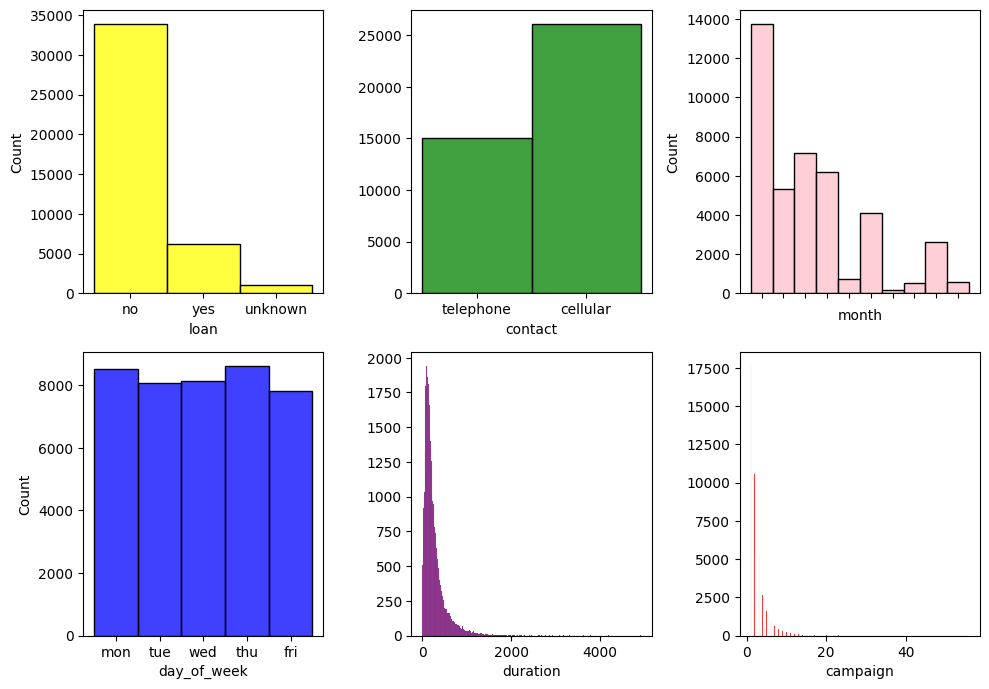

In [39]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="loan", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="contact", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="month", color="pink").set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=bank_df, x="day_of_week", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="duration", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="campaign", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

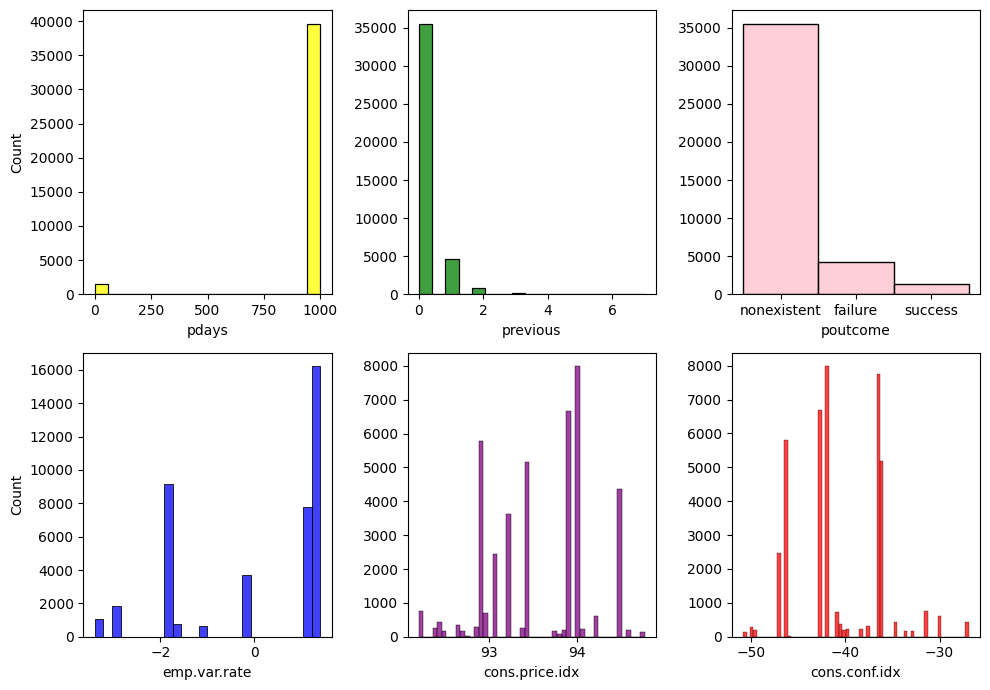

In [40]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="pdays", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="previous", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="poutcome", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="emp.var.rate", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="cons.price.idx", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="cons.conf.idx", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

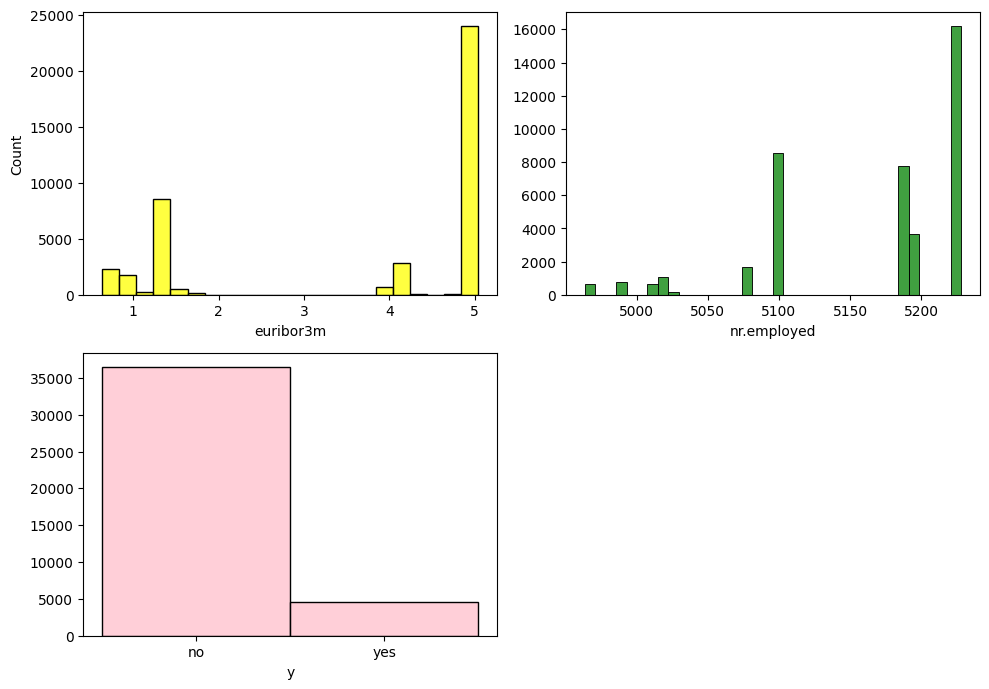

In [41]:
fig, axis= plt.subplots(2, 2, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="euribor3m", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="nr.employed", color="green").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="y", color="pink").set(ylabel=None)

axis[1, 1].remove()

plt.tight_layout()
plt.show()

#### - Análisis de variables multivariante

<Axes: xlabel='poutcome', ylabel='count'>

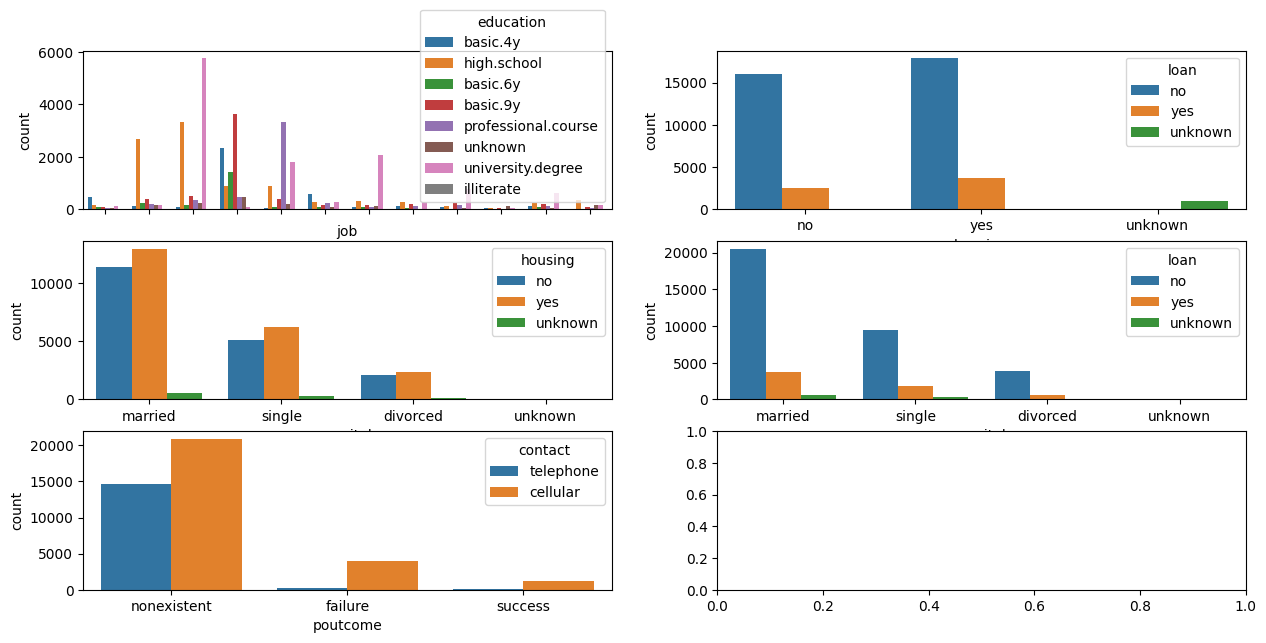

In [42]:
# Análisis Categórico-categórico
fig, axis = plt.subplots(3, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = bank_df, x = "job", hue = "education").set_xticklabels([]) 
sns.countplot(ax = axis[0, 1], data = bank_df, x = "housing", hue = "loan")
sns.countplot(ax = axis[1, 0], data = bank_df, x = "marital", hue = "housing")
sns.countplot(ax = axis[1, 1], data = bank_df, x = "marital", hue = "loan")
sns.countplot(ax = axis[2, 0], data = bank_df, x = "poutcome", hue = "contact")


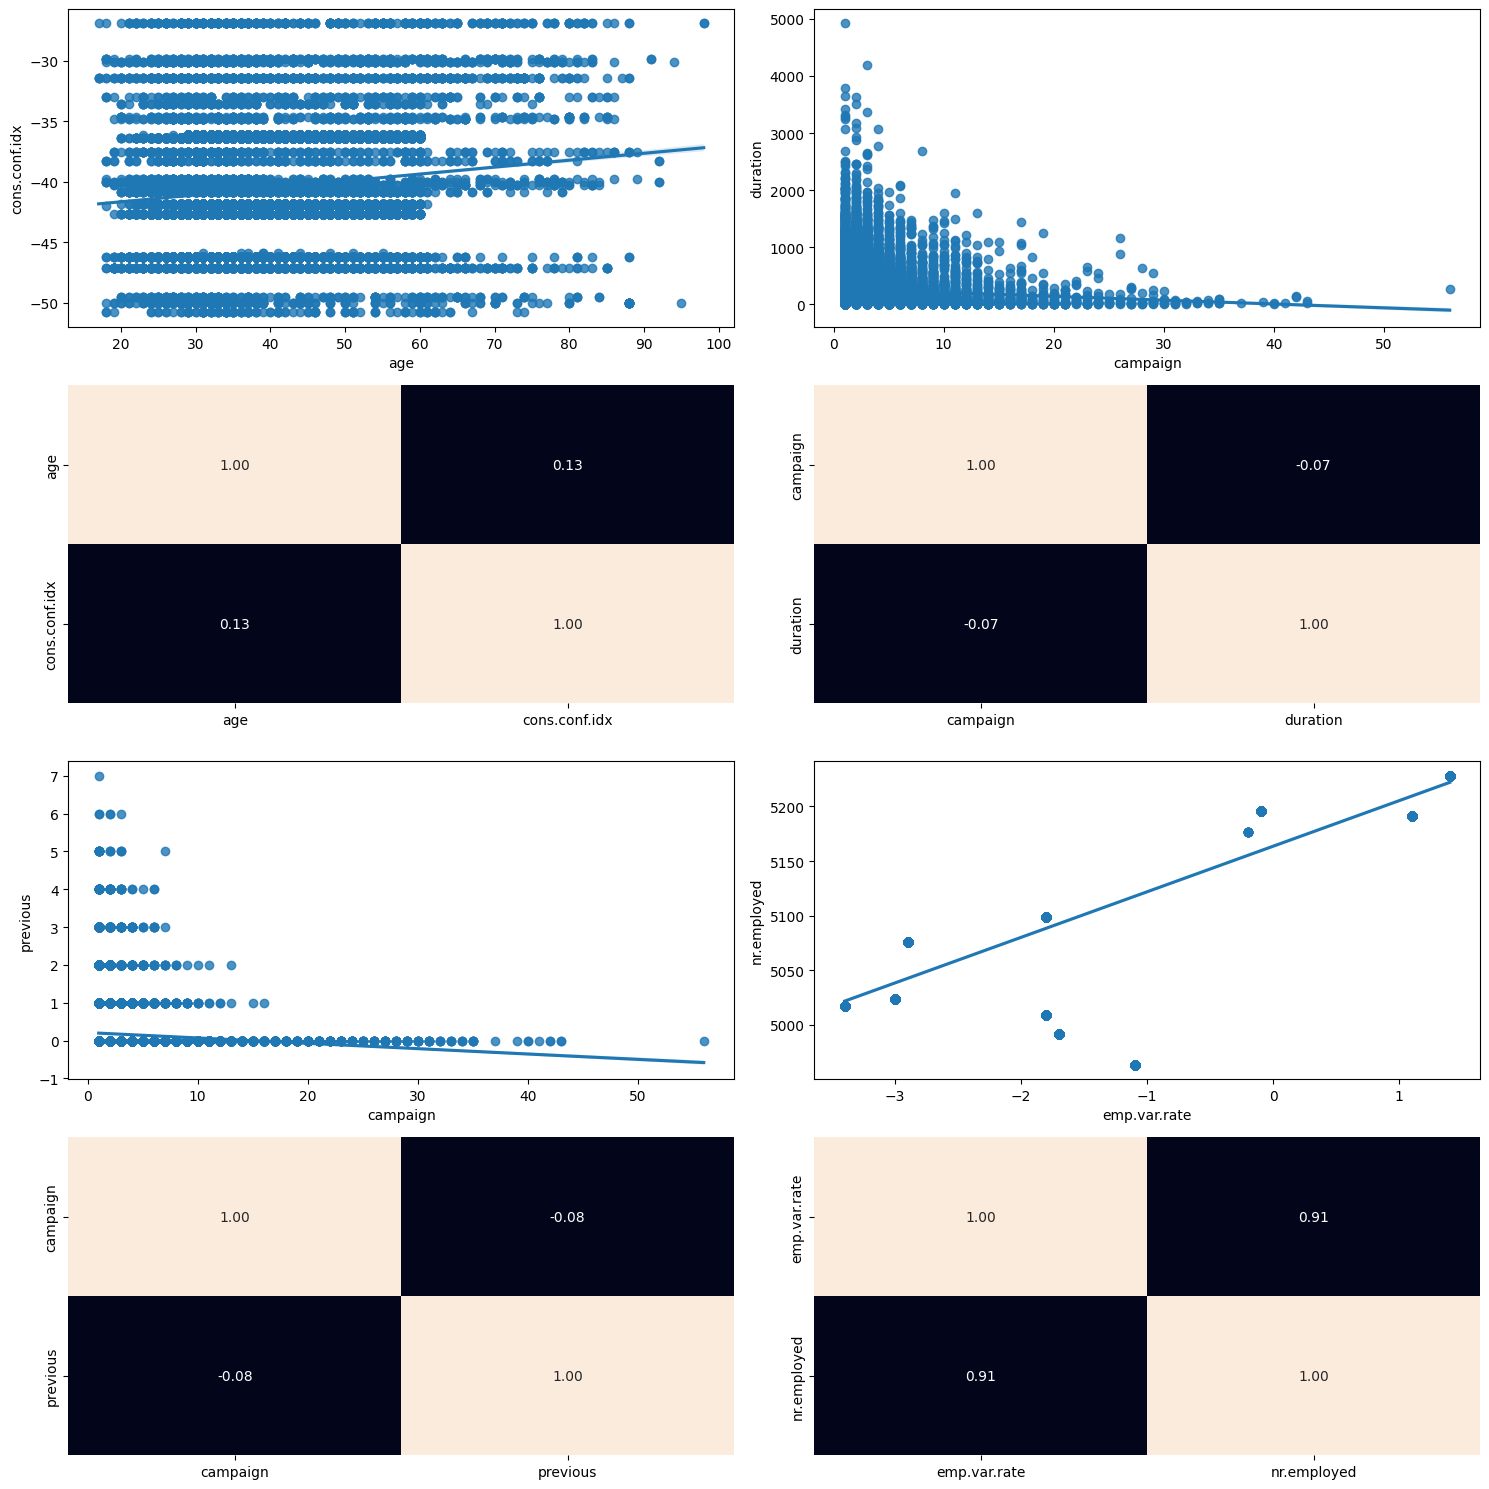

In [43]:
# Análisis numérico-numérico
fig, axis = plt.subplots(4, 2, figsize = (15, 15))


sns.regplot(ax = axis[0, 0], data = bank_df, x = "age", y = "cons.conf.idx")
sns.heatmap(bank_df[["age", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)


sns.regplot(ax = axis[0, 1], data = bank_df, x = "campaign", y = "duration")
sns.heatmap(bank_df[["campaign", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


sns.regplot(ax = axis[2, 0], data = bank_df, x = "campaign", y = "previous")
sns.heatmap(bank_df[["campaign", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)


sns.regplot(ax = axis[2, 1], data = bank_df, x = "emp.var.rate", y = "nr.employed")
sns.heatmap(bank_df[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)


plt.tight_layout()
plt.show()


In [44]:
# Factorizar variables categóricas
bank_df["job_n"] = pd.factorize(bank_df["job"])[0]
bank_df["marital_n"] = pd.factorize(bank_df["marital"])[0]
bank_df["education_n"] = pd.factorize(bank_df["education"])[0]
bank_df["default_n"] = pd.factorize(bank_df["default"])[0]
bank_df["housing_n"] = pd.factorize(bank_df["housing"])[0]
bank_df["loan_n"] = pd.factorize(bank_df["loan"])[0]
bank_df["contact_n"] = pd.factorize(bank_df["contact"])[0]
bank_df["month_n"] = pd.factorize(bank_df["month"])[0]
bank_df["day_of_week_n"] = pd.factorize(bank_df["day_of_week"])[0]
bank_df["poutcome_n"] = pd.factorize(bank_df["poutcome"])[0]
bank_df["y_n"] = pd.factorize(bank_df["y"])[0]

num_variables_n = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

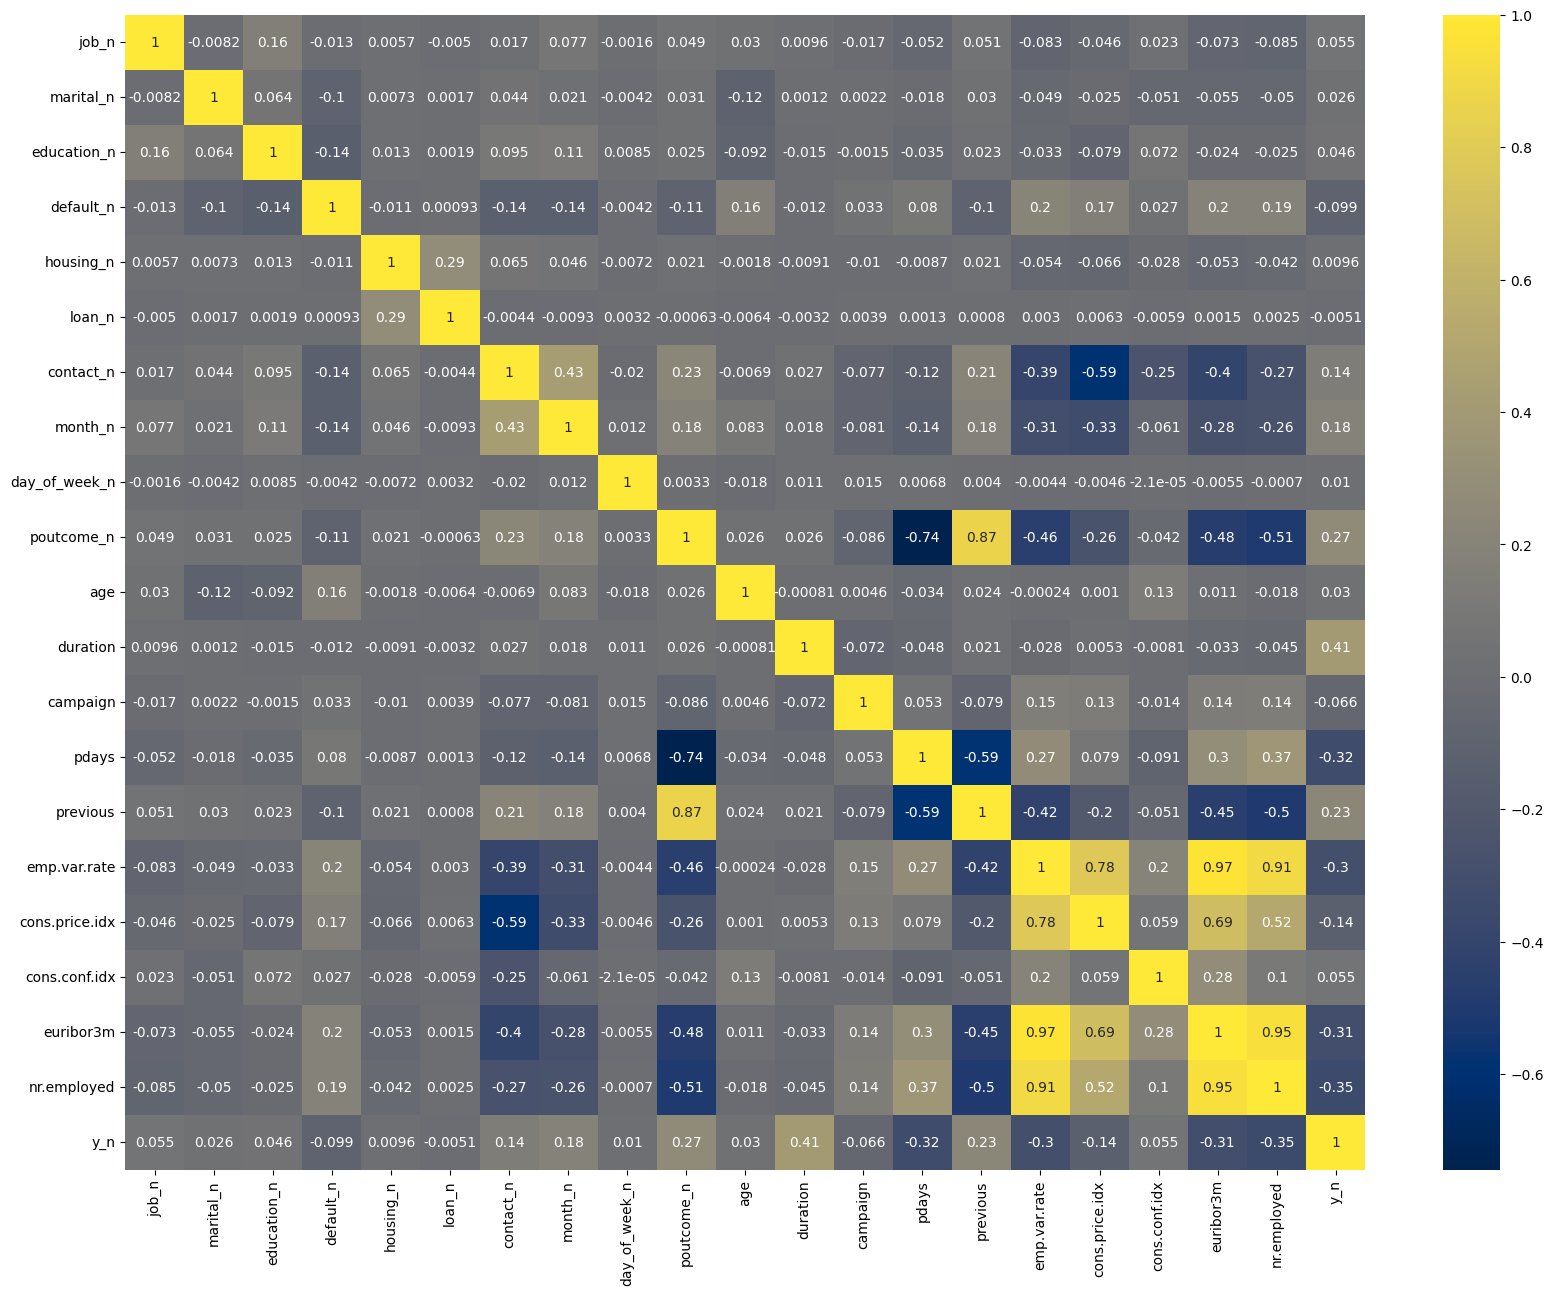

In [45]:
# Mapa de correlación completo
fig, axis = plt.subplots(figsize=(20, 15))

sns.heatmap(bank_df[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot=True, cmap="cividis")

plt.show()


* Tenemos un mapa de calor débil, con pocas correlaciones.
* Podemos decir que hay correlación positiva fuerte entre:
    * La 'tasa de Euribor' y la 'tasa de variación del empleo'.
    * La 'tasa de Euribor' y el 'número de empleados'.
    * La 'tasa de variación del empleo' y 'número de empleados'.
    * El 'Número de contactos realizados durante la campaña anterior al cliente ' y el 'Resultado de la campaña de marketing anterior'.
    * La 'tasa de variación del empleo ' y 'Índice de precios al consumidor'.
* Analizamos la correlación de 'Y', tenemos correlaciones débiles y/o generales:
    * Débil con 'Duración del contacto previo en segundos'
    * General con:
        * 'Tipo de comunicación de contacto'
        * 'Último mes en el que se le ha contactado'
        * 'Número de contactos realizados durante la campaña anterior al cliente'
        * 'Resultado de la campaña de marketing anterior'

#### - Análisis de valores atípicos

In [46]:
# Análisis descriptivo
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


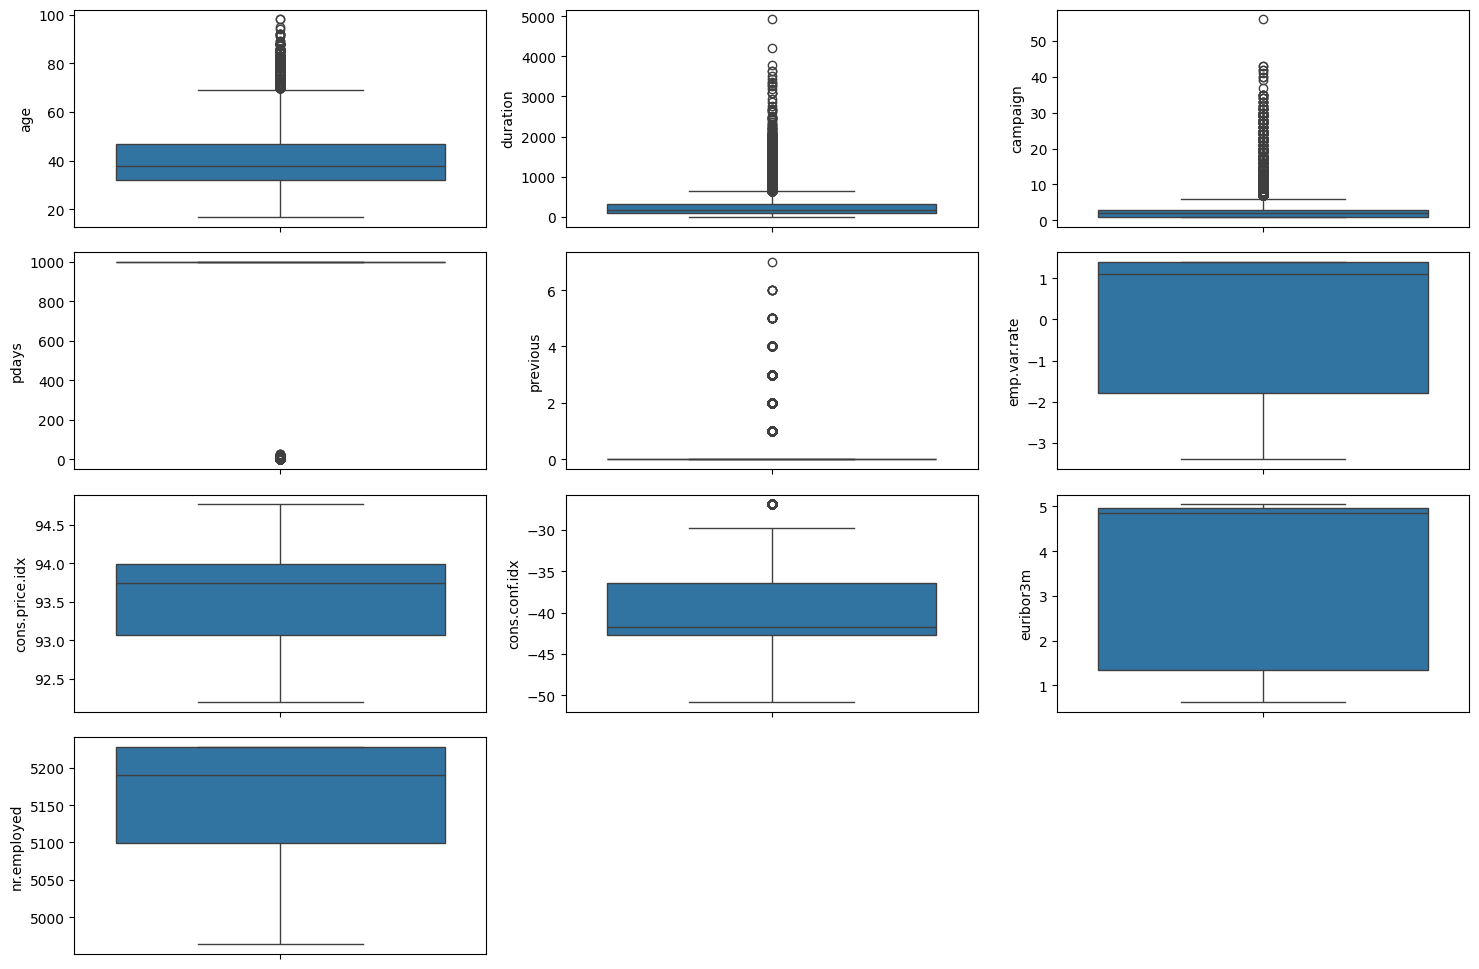

In [47]:
# Análisis de outliers (Numéricos)
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = bank_df, y = "age")
sns.boxplot(ax = axis[0, 1], data = bank_df, y = "duration")
sns.boxplot(ax = axis[0, 2], data = bank_df, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = bank_df, y = "pdays")
sns.boxplot(ax = axis[1, 1], data = bank_df, y = "previous")
sns.boxplot(ax = axis[1, 2], data = bank_df, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 0], data = bank_df, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 1], data = bank_df, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 2], data = bank_df, y = "euribor3m")
sns.boxplot(ax = axis[3, 0], data = bank_df, y = "nr.employed")

plt.tight_layout()
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.show()



In [48]:
# Análisis de valores faltantes
bank_df.isnull().sum()
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


#### - Dividir en Train y Test

In [49]:
from sklearn.model_selection import train_test_split

X = bank_df.drop("y_n", axis = 1)
y = bank_df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
37079,53,management,married,unknown,no,yes,yes,telephone,jul,tue,...,6,0,5,0,1,1,0,2,1,0
245,33,services,divorced,unknown,no,no,no,telephone,may,mon,...,1,2,5,0,0,0,0,0,0,0
36379,43,admin.,married,university.degree,no,no,yes,cellular,jun,tue,...,2,0,6,0,0,1,1,1,1,0
38527,62,retired,married,high.school,no,no,no,cellular,oct,wed,...,5,0,1,0,0,0,1,4,2,2
525,47,admin.,single,unknown,unknown,yes,no,telephone,may,tue,...,2,1,5,1,1,0,0,0,1,0


In [50]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
15697,55,blue-collar,married,basic.4y,unknown,yes,no,cellular,jul,mon,...,3,0,0,1,1,0,1,2,0,0
32778,28,technician,married,university.degree,no,no,no,cellular,may,mon,...,4,0,6,0,0,0,1,0,0,0
10099,35,blue-collar,married,basic.6y,no,yes,no,telephone,jun,thu,...,3,0,2,0,1,0,0,1,3,0
40636,26,admin.,single,university.degree,no,yes,no,cellular,sep,tue,...,2,1,6,0,1,0,1,9,1,0
11872,51,blue-collar,divorced,unknown,unknown,no,no,telephone,jun,fri,...,3,2,5,1,0,0,0,1,4,0


#### - Escalado de variables

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(bank_df[num_variables_n])
bank_df_scal = pd.DataFrame(scal_features, index = bank_df.index, columns = num_variables_n)
bank_df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


#### - Selección de características

In [52]:
# Feature selection
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = bank_df_scal.drop("y_n", axis = 1)
y = bank_df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [53]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


In [54]:
# Guardamos nuestro Train y Test

X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/clean_test.csv", index = False)

## Logistic Regression model

In [55]:
# Cargamos Train y Test
train_data = pd.read_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/clean_train.csv")
test_data = pd.read_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.0,0.333333,0.175924,0.512287,0.0


In [56]:
# Extraemos las columnas excepto el 'target' para preparar los conjuntos de entrenamiento y prueba
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [57]:
# Modelo de regresión logística
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=71)
model.fit(X_train, y_train)

LogisticRegression(random_state=71)

In [58]:
# Etiquetas predichas por el modelo para cada instancia en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
# Calcular la precisión del modelo de regresión logística
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8921806702282662

## Model Optimization

In [60]:
from sklearn.model_selection import GridSearchCV

# Definición de Hiperparámetros
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# La búsqueda en malla 
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=71),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [61]:
# Mejores hiperparámetros
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [62]:
# Ajustar a los mejores hiperparámetros
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [63]:
# Predicciones en el de prueba
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
# Evaluar la precisión del modelo de regresión logística
accuracy_score(y_test, y_pred)

0.8938805245264692

In [65]:
from pickle import dump

dump(model, open("/workspaces/logistic-regression-project-tutorial-pilarzarco/logistic-regression.sav", "wb"))